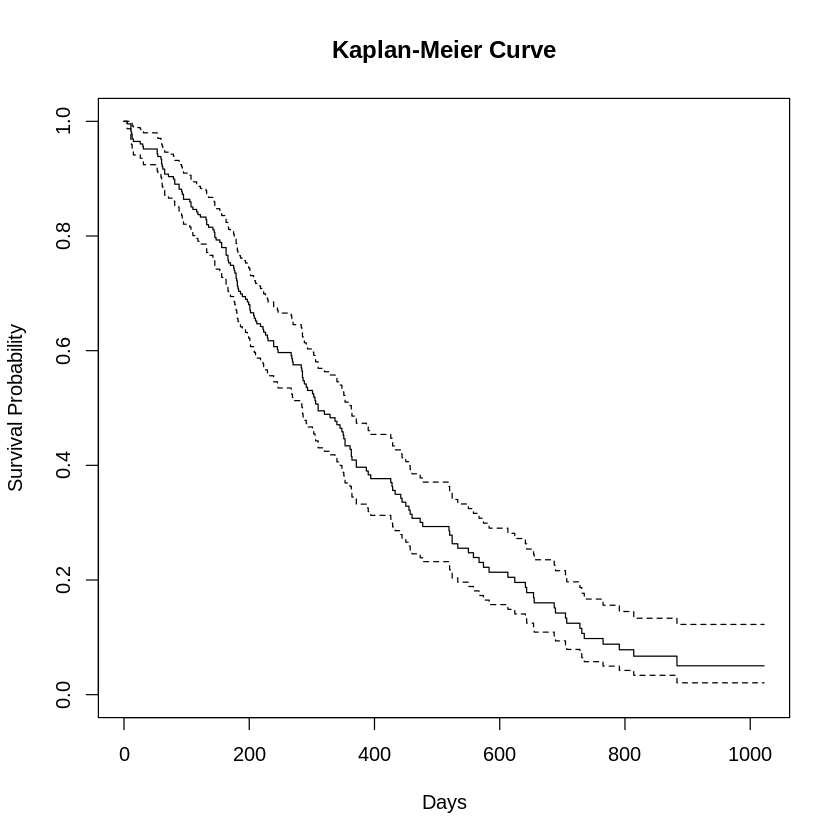

In [1]:
# 导入所需的库
library(survival)
library(ggplot2)

# 读取数据
surv_data <- read.csv("survival_data.csv")

# 创建生存对象
surv_obj <- with(surv_data, Surv(Time, Event))

# 生成Kaplan-Meier生存曲线
km_fit <- survfit(surv_obj ~ 1)
km_fit_df <- data.frame(time = km_fit$time, surv = km_fit$surv, type = "Kaplan-Meier")

# 生成Cox比例风险模型生存曲线
cox_fit <- coxph(surv_obj ~ 1)
cox_fit_df <- data.frame(time = km_fit$time, surv = exp(-predict(cox_fit)), type = "Cox PH")

# 合并生存曲线数据框
surv_curve_df <- rbind(km_fit_df, cox_fit_df)

# 创建生存曲线图
ggplot(surv_curve_df, aes(x = time, y = surv, colour = type)) +
    geom_step() +
    scale_x_continuous(name = "时间", breaks = seq(0, max(surv_curve_df$time), 500)) +
    scale_y_continuous(name = "生存概率", limits = c(0, 1.05), breaks = seq(0, 1, 0.1)) +
    theme_bw() +
    theme(legend.position = "bottom", legend.title = element_blank())
